# Clasificación de rayos cósmicos

Calculo el valor crítico del observable X para clasificar rayos cósmicos. Calculo la precisión y el poder de la clasificación. Considero tres casos para el hierro: μ₁=650 (caso realista), 610 (hierro y protón bien separados) y 700 (hierro y protrón muy mezclados)

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

Protón

In [2]:
mu0 = 730
sigma0 = 40
hipotesis_nula = norm(loc=mu0, scale=sigma0)

Hierro

In [3]:
mu1 = 610  # hierro y protón bien separados
#mu1 = 700 # hierro y protón muy mezclados
# mu1 = 650   # realista: caso intermedio
sigma1 = 20
hipotesis_alternativa = norm(loc=mu1, scale=sigma1)

### Figuras PDFs y P(error)

In [4]:
# espacio lineal para valores de X
x = np.linspace(mu1-3*sigma1, mu0+3*sigma0, 256)

In [5]:
# calculamos el valor crítico
valor_critico = (sigma0 * mu1 + sigma1 * mu0 ) / (sigma0+sigma1)
valor_critico

650.0

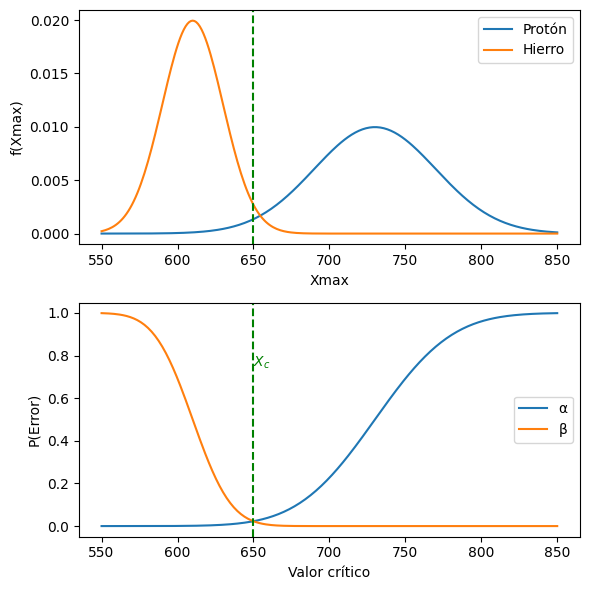

In [6]:
fig = plt.figure(figsize=(6,6), dpi=100)

ax1, ax2 = fig.subplots(2)

# graficamos hipótesis
ax1.plot(x, hipotesis_nula.pdf(x), label='Protón')
ax1.plot(x, hipotesis_alternativa.pdf(x), label='Hierro')

# graficamos la probabilidad de error
ax2.plot(x, hipotesis_nula.cdf(x), label='α')
ax2.plot(x, hipotesis_alternativa.sf(x), label='β')

# graficamos el valor crítico
ax1.axvline(valor_critico, color='green', ls='--')
ax2.axvline(valor_critico, color='green', ls='--')
ax2.text(valor_critico, 0.75, '$X_c$', color='green', horizontalalignment='left')

# formato para los ejes
ax1.set_xlabel('Xmax'); ax1.set_ylabel('f(Xmax)')
ax2.set_xlabel('Valor crítico'); ax2.set_ylabel('P(Error)')
# leyenda
ax1.legend()
ax2.legend()

fig.tight_layout()
plt.show()

In [7]:
# probabilidad de error
a = (mu0-mu1) / (sigma0+sigma1)
a

2.0

In [8]:
# calculo de la significancia
alpha = norm.sf(a)
print("Significancia (α) = ", alpha )

Significancia (α) =  0.022750131948179195


In [9]:
# calculo del beta
beta = alpha
print("Beta = ", beta )

Beta =  0.022750131948179195


In [10]:
precision = 1 - alpha
print(f'Precisión: {100*precision:.1f}%')

Precisión: 97.7%


In [11]:
poder = 1 - beta
print(f'Poder: {100*poder:.1f}%')

Poder: 97.7%
